In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/hearing_test.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

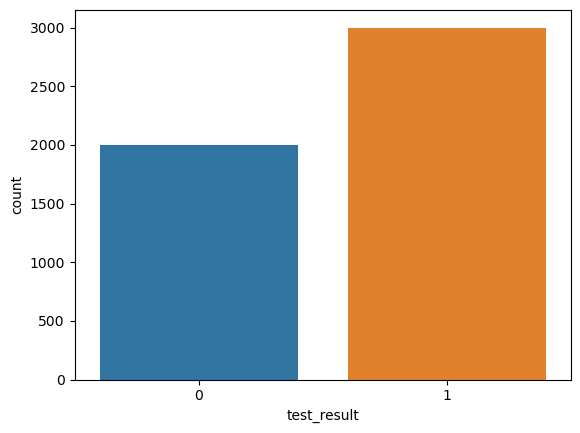

In [7]:
sns.countplot(data=df,x=df['test_result'])

<Axes: xlabel='age', ylabel='physical_score'>

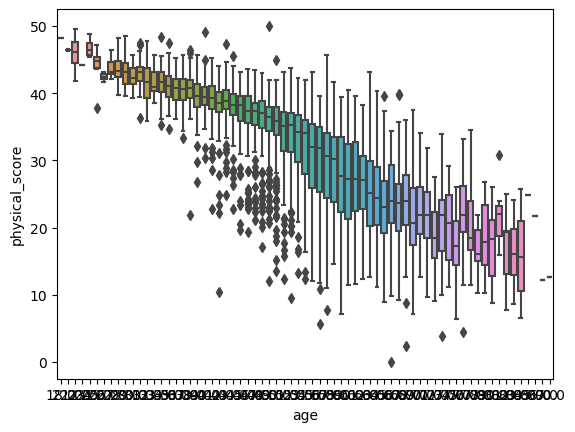

In [8]:
sns.boxplot(x='age',y='physical_score',data=df)

<Axes: xlabel='physical_score', ylabel='age'>

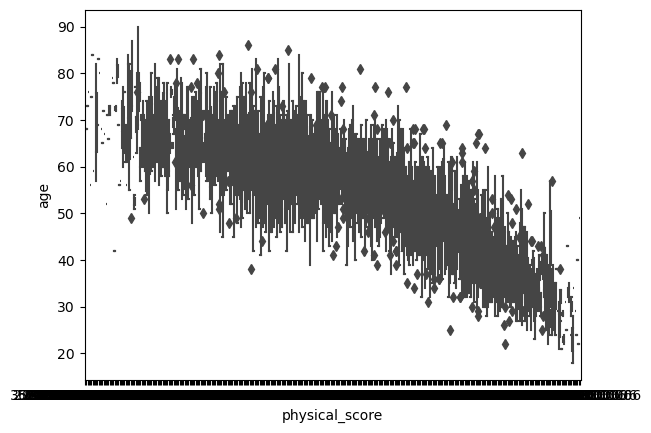

In [9]:
sns.boxplot(y='age',x='physical_score',data=df)

<Axes: xlabel='test_result', ylabel='age'>

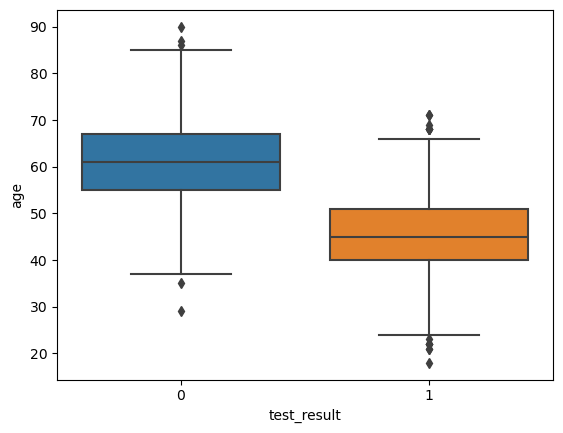

In [10]:
sns.boxplot(y='age',x='test_result',data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

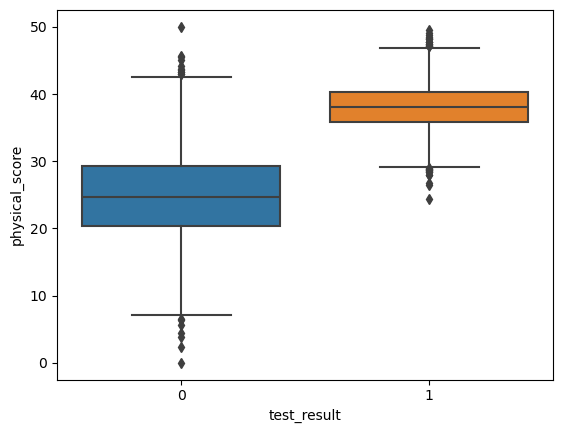

In [11]:
sns.boxplot(y='physical_score',x='test_result',data=df)

In [ ]:
sns.pairplot(df,hue='test_result')

<Axes: >

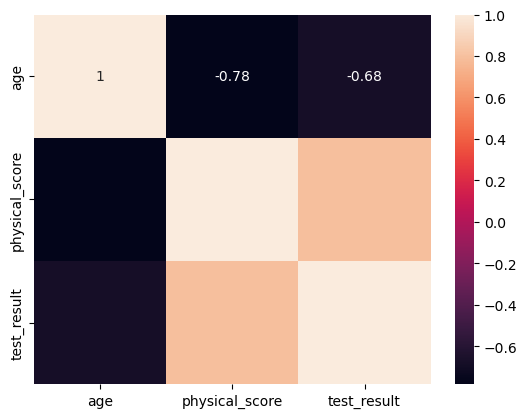

In [13]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

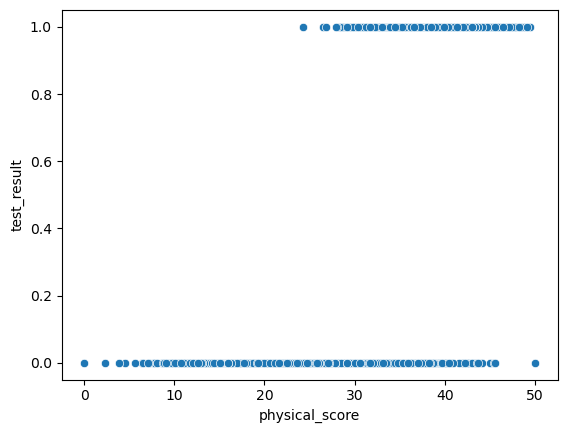

In [14]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

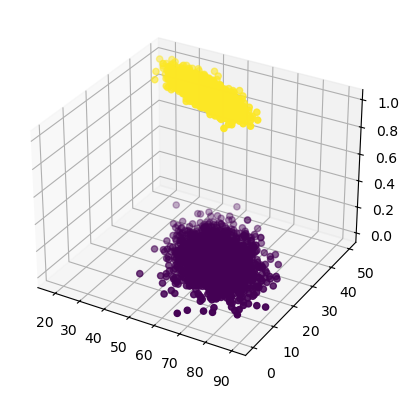

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [16]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [17]:
X = df.drop('test_result',axis=1)
X

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [18]:
y = df['test_result']
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model = LogisticRegression()

In [25]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [26]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
y_pred = log_model.predict(scaled_X_test)

In [29]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [30]:
accuracy_score(y_test,y_pred)

0.93

In [31]:
cm = confusion_matrix(y_test,y_pred)

In [32]:
#Can plot this confusion metrics

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

In [34]:
help(ConfusionMatrixDisplay)

Help on class ConfusionMatrixDisplay in module sklearn.metrics._plot.confusion_matrix:

class ConfusionMatrixDisplay(builtins.object)
 |  ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)
 |  
 |  Confusion Matrix visualization.
 |  
 |  It is recommend to use
 |  :func:`~sklearn.metrics.ConfusionMatrixDisplay.from_estimator` or
 |  :func:`~sklearn.metrics.ConfusionMatrixDisplay.from_predictions` to
 |  create a :class:`ConfusionMatrixDisplay`. All parameters are stored as
 |  attributes.
 |  
 |  Read more in the :ref:`User Guide <visualizations>`.
 |  
 |  Parameters
 |  ----------
 |  confusion_matrix : ndarray of shape (n_classes, n_classes)
 |      Confusion matrix.
 |  
 |  display_labels : ndarray of shape (n_classes,), default=None
 |      Display labels for plot. If None, display labels are set from 0 to
 |      `n_classes - 1`.
 |  
 |  Attributes
 |  ----------
 |  im_ : matplotlib AxesImage
 |      Image representing the confusion matrix.
 |  
 |  text_ : nda

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

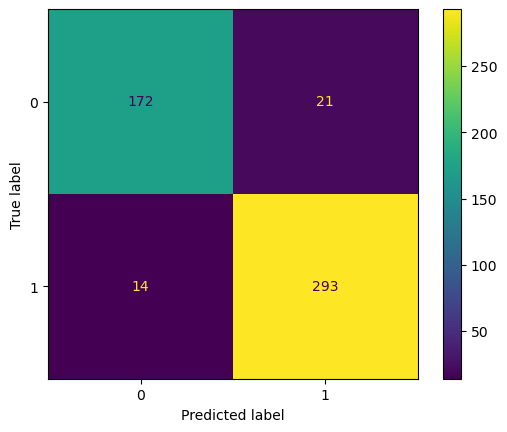

In [36]:
disp.plot()

In [37]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.89      0.91       193\n           1       0.93      0.95      0.94       307\n\n    accuracy                           0.93       500\n   macro avg       0.93      0.92      0.93       500\nweighted avg       0.93      0.93      0.93       500\n'

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [39]:
from sklearn.metrics import precision_score, recall_score

In [40]:
precision_score(y_test,y_pred)

0.9331210191082803

In [41]:
recall_score(y_test,y_pred)

0.9543973941368078

In [42]:
#from sklearn.metrics import precision_recall_curve,roc_curve

In [43]:
#help(roc_curve)
#rc = roc_curve(y_test,y_pred, pos_label=2)